In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=5000, n_features=2, centers=[(2, 2), (5, 7)], random_state=42)

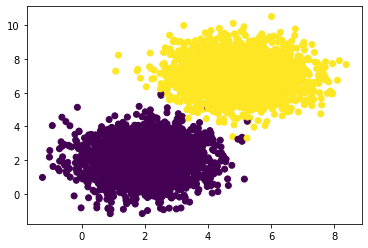

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [4]:
X_imbalanced = np.vstack((X[y == 1][:50].reshape(-1,2), X[y == 0].reshape(-1,2)))
y_imbalanced = np.vstack((y[y==1][:50].reshape(-1,1), y[y==0].reshape(-1,1)) ).reshape(-1)

In [5]:
X_imbalanced.shape, y_imbalanced.shape

((2550, 2), (2550,))

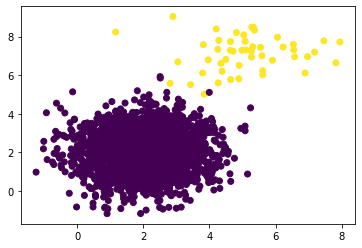

In [6]:
plt.scatter(X_imbalanced[:, 0], X_imbalanced[:, 1], c=y_imbalanced)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_imbalanced, y_imbalanced)

LogisticRegression()

In [10]:
model.score(X_imbalanced, y_imbalanced)

0.9984313725490196

In [11]:
y_pred = model.predict_proba(X_imbalanced)[:, 1]

In [12]:
for t in np.arange(0, 1, 0.05):
    print(f"Accuracy @ t = {t} => {((y_pred >= t) == y_imbalanced).mean()}")

Accuracy @ t = 0.0 => 0.0196078431372549
Accuracy @ t = 0.05 => 0.995686274509804
Accuracy @ t = 0.1 => 0.9976470588235294
Accuracy @ t = 0.15000000000000002 => 0.9980392156862745
Accuracy @ t = 0.2 => 0.9980392156862745
Accuracy @ t = 0.25 => 0.9980392156862745
Accuracy @ t = 0.30000000000000004 => 0.9980392156862745
Accuracy @ t = 0.35000000000000003 => 0.9976470588235294
Accuracy @ t = 0.4 => 0.9976470588235294
Accuracy @ t = 0.45 => 0.9984313725490196
Accuracy @ t = 0.5 => 0.9984313725490196
Accuracy @ t = 0.55 => 0.9984313725490196
Accuracy @ t = 0.6000000000000001 => 0.9984313725490196
Accuracy @ t = 0.65 => 0.9984313725490196
Accuracy @ t = 0.7000000000000001 => 0.9984313725490196
Accuracy @ t = 0.75 => 0.9984313725490196
Accuracy @ t = 0.8 => 0.9980392156862745
Accuracy @ t = 0.8500000000000001 => 0.9980392156862745
Accuracy @ t = 0.9 => 0.9972549019607844
Accuracy @ t = 0.9500000000000001 => 0.996078431372549


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [14]:
confusion_matrix(y_imbalanced, y_pred=model.predict(X_imbalanced))

array([[2500,    0],
       [   4,   46]], dtype=int64)

In [15]:
print(classification_report(y_imbalanced, model.predict(X_imbalanced), digits=5))

              precision    recall  f1-score   support

           0    0.99840   1.00000   0.99920      2500
           1    1.00000   0.92000   0.95833        50

    accuracy                        0.99843      2550
   macro avg    0.99920   0.96000   0.97877      2550
weighted avg    0.99843   0.99843   0.99840      2550



### Reciever Operating Characterstics Curve

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
fpr, tpr, thresholds = roc_curve(y_score=model.predict_proba(X_imbalanced)[:, 1], y_true=y_imbalanced)

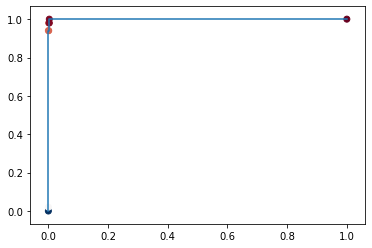

In [28]:
plt.plot(fpr, tpr)
plt.scatter(fpr, tpr, c=thresholds, cmap=plt.cm.RdBu)
plt.show()

In [31]:
roc_auc_score(y_score=model.predict_proba(X_imbalanced)[:, 1], y_true=y_imbalanced)

0.999888